In [1]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import seaborn as sns
import seaborn as sb
from tensorflow import keras
import tensorflow as tf
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Importing
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
all_data = [train_data, test_data]

#Assigning int value to string value in Embarked and Sex
E = {'Embarked':{'C': 0, 'Q': 1, 'S': 2},'Sex': {'male':0,'female':1}}
train_data.replace(E, inplace = True)
test_data.replace(E, inplace = True)

#Pearson(All features)(without adding missing values)
rho = train_data.corr(method="pearson")
print("Pearson Correlation is")
display(rho)
print("")


Pearson Correlation is


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013166
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.169718
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.164681
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.110320
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.032565
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.068900
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.040449
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.110320,-0.032565,0.068900,0.040449,-0.226311,1.000000


In [2]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2


In [3]:
#Dropping columns
train_data = train_data.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)


In [4]:
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.535433
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [5]:
train_data.shape

(891, 8)

In [6]:
#adding median value of the age in place of missing values
q = train_data.loc[:,"Age"].median()
train_data = train_data.fillna({'Age': q})


train_data['Embarked'] = train_data['Embarked'].fillna(2)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [8]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


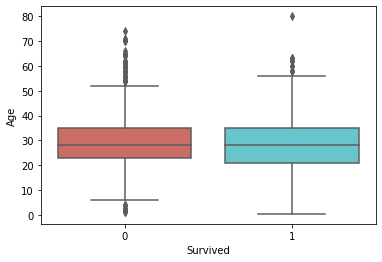

In [9]:
#Plotting Age and survived
sb.boxplot(x='Survived', y='Age', data=train_data, palette='hls')

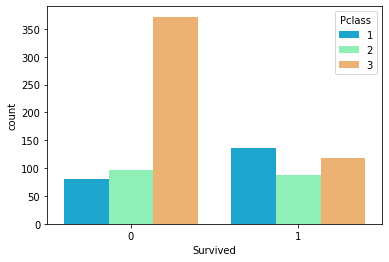

In [10]:
sns.countplot(x='Survived', hue='Pclass', data= train_data, palette='rainbow')

In [11]:
#Pearson(all features)
rho = train_data.corr(method="pearson")
print("Pearson Correlation:")
display(rho)
print("")

#Pearson(Survived -> Age)
x = train_data.Age
y = train_data.Survived
corr, p_value = pearsonr(x, y)
print("Pearson between Survived and Age feature is:")
print(corr)
#print(p_value)

Pearson Correlation:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,-0.108262
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,-0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000



Pearson between Survived and Age feature is:
-0.06491041993052588


In [12]:
# kendall for all features
kendall = train_data.corr(method="kendall")
print("Kendall Tau:")
display(kendall)
print("")

#Kendall(Survived -> Age)
corr, p_value = kendalltau(x, y)
print("Kendall between Survived and Age feature is:")
print(corr)


Kendall Tau:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.323533,0.543351,-0.031055,0.085915,0.133933,0.266229,-0.155747
Pclass,-0.323533,1.000000,-0.129325,-0.254206,-0.039552,-0.021019,-0.573531,0.080867
Sex,0.543351,-0.129325,1.000000,-0.056784,0.188694,0.246536,0.213480,-0.112207
Age,-0.031055,-0.254206,-0.056784,1.000000,-0.115427,-0.174819,0.087221,-0.006112
SibSp,0.085915,-0.039552,0.188694,-0.115427,1.000000,0.425241,0.358262,0.010231
Parch,0.133933,-0.021019,0.246536,-0.174819,0.425241,1.000000,0.330360,0.026272
Fare,0.266229,-0.573531,0.213480,0.087221,0.358262,0.330360,1.000000,-0.051517
Embarked,-0.155747,0.080867,-0.112207,-0.006112,0.010231,0.026272,-0.051517,1.000000



Kendall between Survived and Age feature is:
-0.03105456895245104


In [13]:
#Spearman for all features
spearman = train_data.corr(method="spearman")
print("Spearman Correlation:")
display(spearman)
print("")

#Spearman(Survived -> Age)
corr, p_value = spearmanr(x, y)
print("Spearman between Survived and Age feature is:")
print(corr)

Spearman Correlation:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.339668,0.543351,-0.037004,0.088879,0.138266,0.323736,-0.160196
Pclass,-0.339668,1.000000,-0.135775,-0.317406,-0.043019,-0.022801,-0.688032,0.091977
Sex,0.543351,-0.135775,1.000000,-0.067663,0.195204,0.254512,0.259593,-0.115412
Age,-0.037004,-0.317406,-0.067663,1.000000,-0.145316,-0.217488,0.126006,-0.007900
SibSp,0.088879,-0.043019,0.195204,-0.145316,1.000000,0.450014,0.447113,0.011157
Parch,0.138266,-0.022801,0.254512,-0.217488,0.450014,1.000000,0.410074,0.028365
Fare,0.323736,-0.688032,0.259593,0.126006,0.447113,0.410074,1.000000,-0.074873
Embarked,-0.160196,0.091977,-0.115412,-0.007900,0.011157,0.028365,-0.074873,1.000000



Spearman between Survived and Age feature is:
-0.03700449741729798


AttributeError: module 'seaborn' has no attribute 'plt'

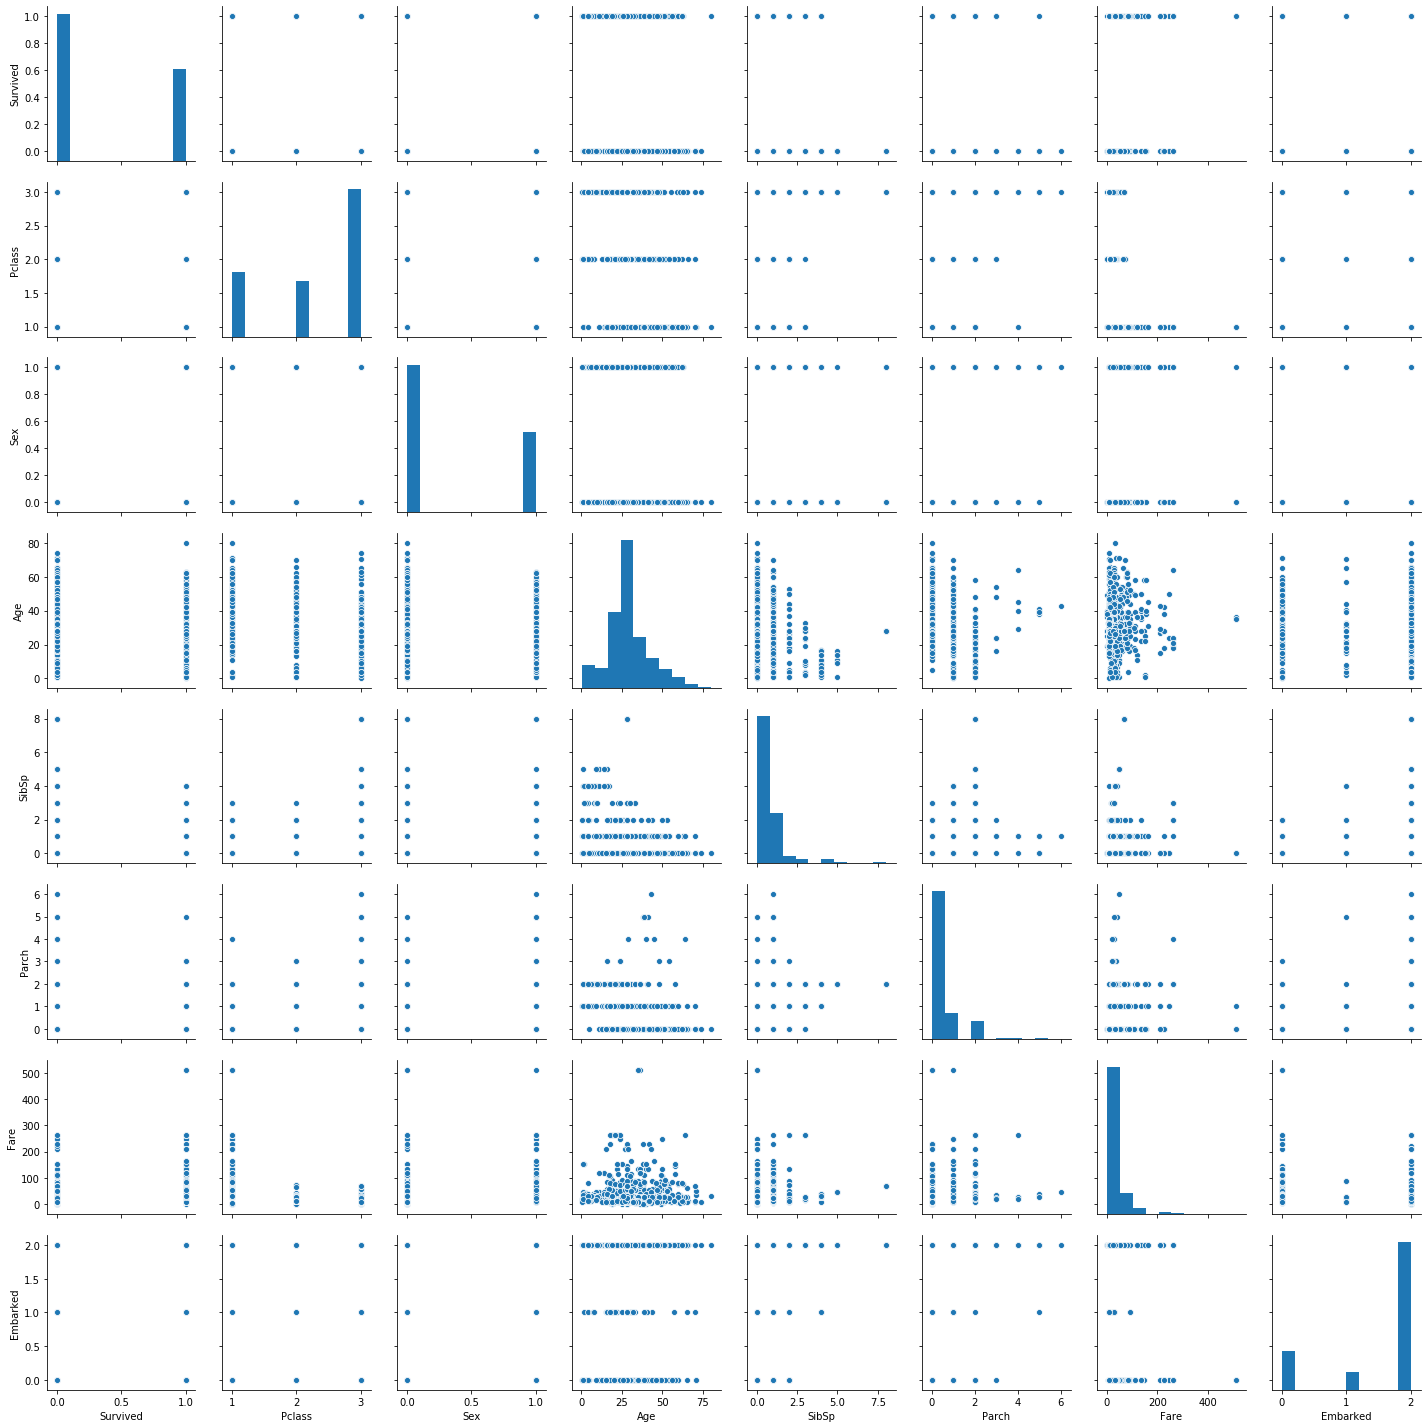

In [14]:
#Plotting all features-Visualising correlation
sns.pairplot(train_data)
sns.plt.show()


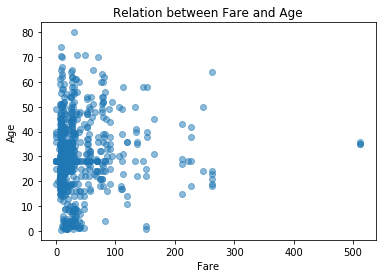

In [15]:
#Visualizing Correlation between Fare and Age
plt.scatter(train_data.Fare, train_data.Age,alpha = 0.5)
plt.title('Relation between Fare and Age')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()


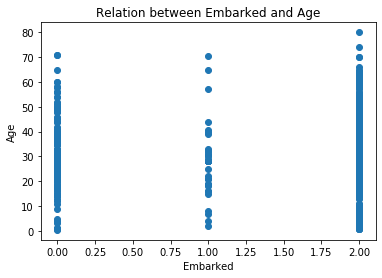

In [16]:
#Visualizing Correlation between Embarked and Age
plt.scatter(train_data.Embarked, train_data.Age)
plt.title('Relation between Embarked and Age')
plt.xlabel('Embarked')
plt.ylabel('Age')
plt.show()


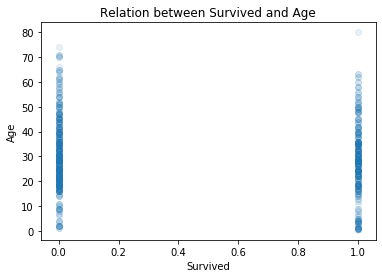

In [17]:
#Visualizing Correlation between Survived and Age
plt.scatter(train_data.Survived, train_data.Age, alpha = 0.1)
plt.title('Relation between Survived and Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


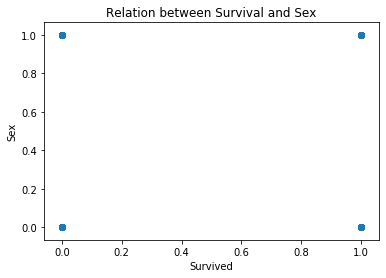

In [18]:
#Visualizing Correlation
plt.scatter(train_data.Survived, train_data.Sex, alpha = 0.1)
plt.title('Relation between Survival and Sex')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()


In [19]:
# Cleaning Test data
test_data = test_data.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)
r = test_data.loc[:,"Age"].median()
test_data = test_data.fillna({'Age': r})

s = test_data.loc[:,"Fare"].median()
test_data = test_data.fillna({'Fare': s})

In [20]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
print(test_data)


     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    0  34.5      0      0    7.8292         1
1         3    1  47.0      1      0    7.0000         2
2         2    0  62.0      0      0    9.6875         1
3         3    0  27.0      0      0    8.6625         2
4         3    1  22.0      1      1   12.2875         2
5         3    0  14.0      0      0    9.2250         2
6         3    1  30.0      0      0    7.6292         1
7         2    0  26.0      1      1   29.0000         2
8         3    1  18.0      0      0    7.2292         0
9         3    0  21.0      2      0   24.1500         2
10        3    0  27.0      0      0    7.8958         2
11        1    0  46.0      0      0   26.0000         2
12        1    1  23.0      1      0   82.2667         2
13        2    0  63.0      1      0   26.0000         2
14        1    1  47.0      1      0   61.1750         2
15        2    1  24.0      1      0   27.7208         0
16        2    0  35.0      0  

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [23]:
#Multiple Logistic Regression
logres = LogisticRegression()
X = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]     
Y = train_data['Survived']
#print(Y)

reg = logres.fit(X,Y)
print(reg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Srujan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
reg.predict(test_data)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
#Confusion Matrix
y_pred = reg.predict(X)
confusion_matrix(Y,y_pred)

array([[474,  75],
       [103, 239]], dtype=int64)

In [26]:
#Neural Network
model = keras.Sequential()

# layers
model.add(keras.layers.Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
model.add(keras.layers.Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(keras.layers.Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(keras.layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.summary()

W1008 13:04:21.193413 13176 deprecation.py:506] From C:\Users\Srujan\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


W1008 13:04:24.983306 13176 deprecation.py:323] From C:\Users\Srujan\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
model.fit(X, Y, batch_size = 32, epochs = 200)

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [29]:
y_pred = model.predict(test_data)
y_final = (y_pred > 0.5).astype(int).reshape(test_data.shape[0])

print(y_final)
print(y_pred)

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version